<a href="https://colab.research.google.com/github/YunJinHeo/Machine-learning-Deep-learning-to-study-alone/blob/main/CH6_Unsupervised_learning/CH6_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06-1 Clustering Algorithm

In [23]:
import requests

url = "https://bit.ly/fruits_300_data"
response = requests.get(url)

if response.status_code == 200:
    with open('fruits_300.npy', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully!")
else:
    print(f"Failed to download file. HTTP status code: {response.status_code}")

File downloaded successfully!


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
fruits = np.load('fruits_300.npy')

In [27]:
print(fruits.shape)

(300, 100, 100)


In [28]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


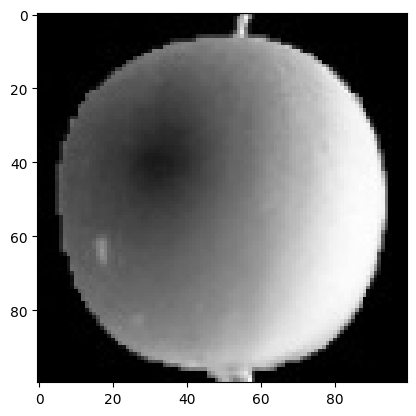

In [29]:
plt.imshow(fruits[0], cmap = 'gray')
plt.show()

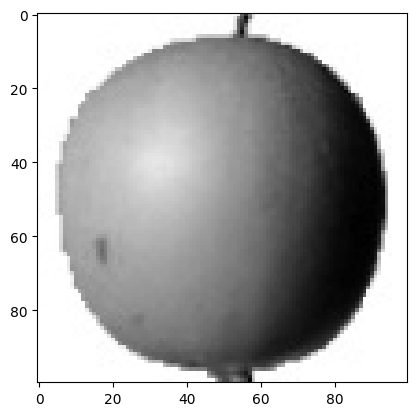

In [31]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

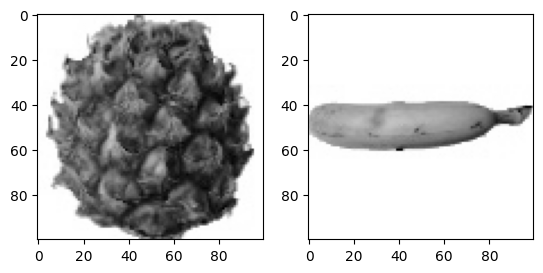

In [32]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')

In [35]:
apple = fruits[0 : 100].reshape(-1, 100*100)
apple.shape

(100, 10000)

In [38]:
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200 : 300].reshape(-1, 100*100)

In [39]:
np.mean(apple, axis = 1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

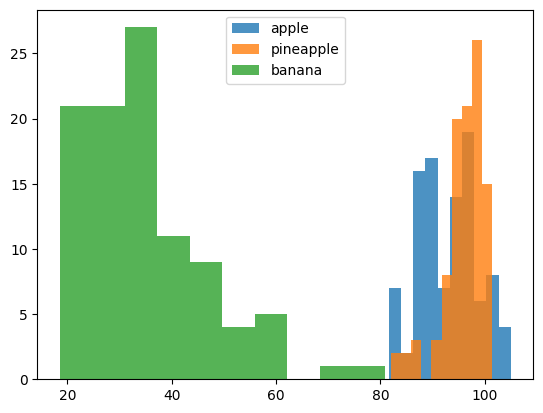

In [40]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

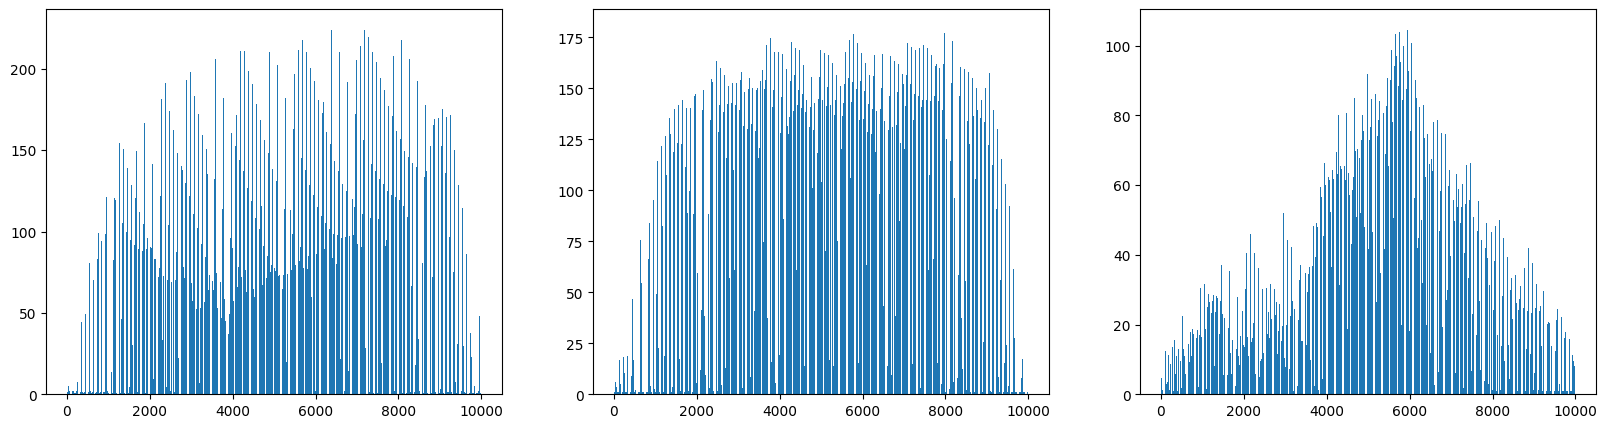

In [42]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

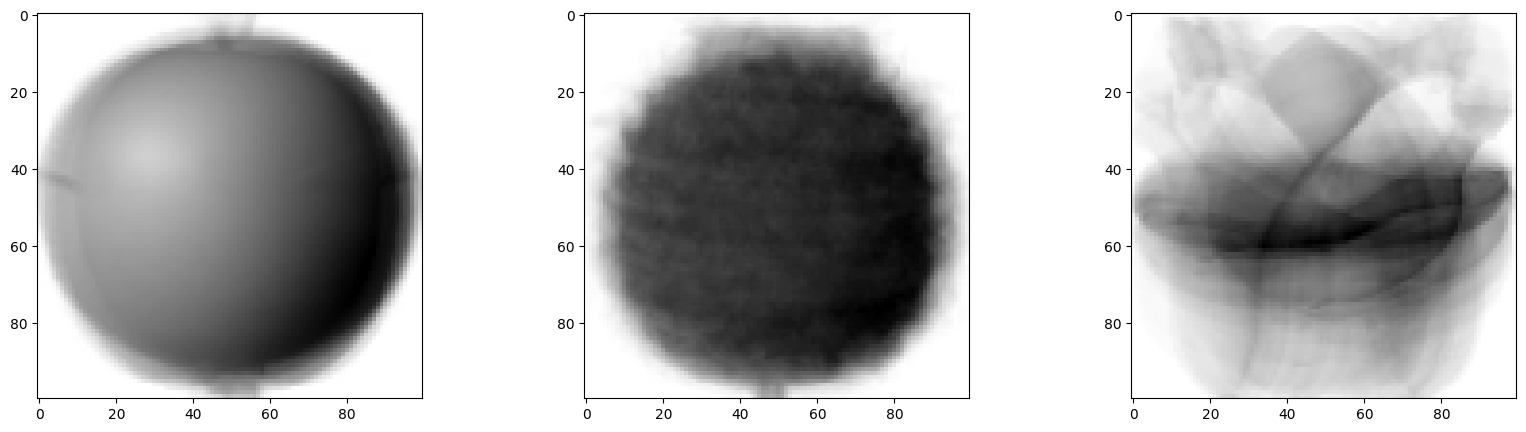

In [44]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100,100)
banana_mean = np.mean(banana, axis = 0).reshape(100,100)
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

In [45]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


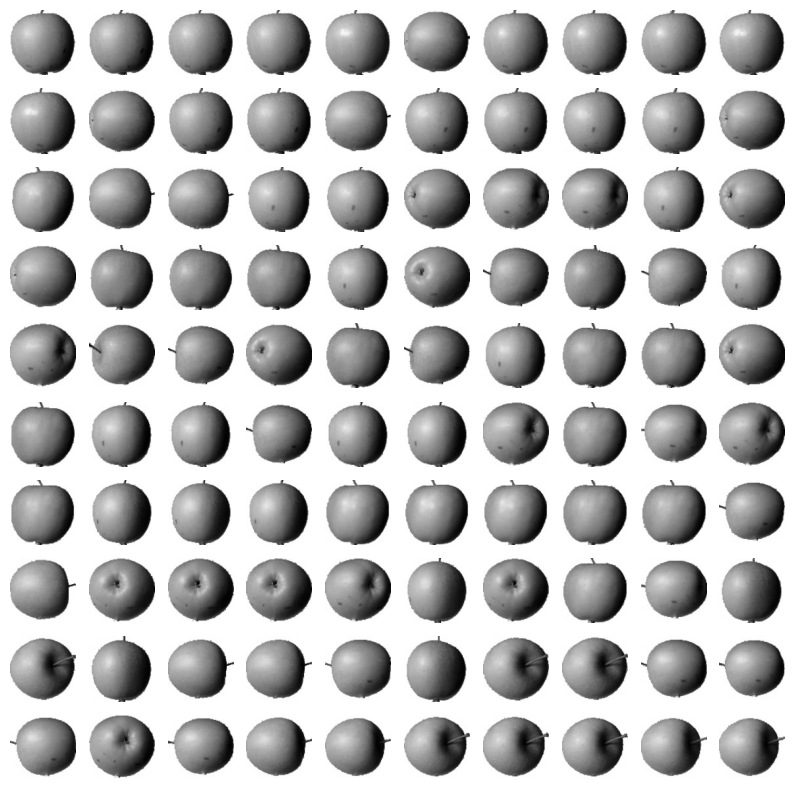

In [52]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10) :
  for j in range(10) :
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')

plt.show()

In [54]:
banana.shape

(100, 10000)

In [55]:
banana_mean.shape

(100, 100)

In [57]:
fruits.shape

(300, 100, 100)

In [58]:
abs_banana_diff = np.abs(fruits - banana_mean)

In [59]:
abs_banana_diff_mean = np.mean(abs_banana_diff, axis = (1,2))

In [60]:
abs_banana_diff_mean.shape

(300,)

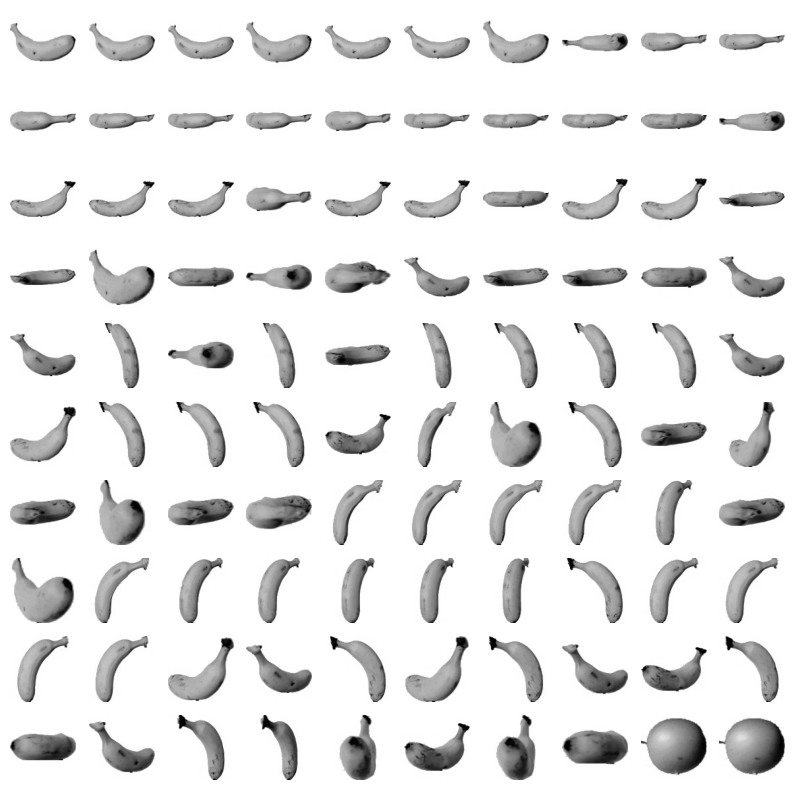

In [62]:
banana_index = np.argsort(abs_banana_diff_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10) :
  for j in range(10) :
    axs[i, j].imshow(fruits[banana_index[i*10+j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

# 06-2 k-means

In [63]:
fruits.shape

(300, 100, 100)

In [65]:
fruits_2d = fruits.reshape(-1, 100*100)

In [67]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [68]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [69]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [75]:
def draw_fruits(arr, ratio = 1) :
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows) :
    for j in range(cols) :
      if i*10 + j < n :
        axs[i, j].imshow(arr[i*10 + j], cmap ='gray_r')
      axs[i, j].axis('off')

  plt.show()

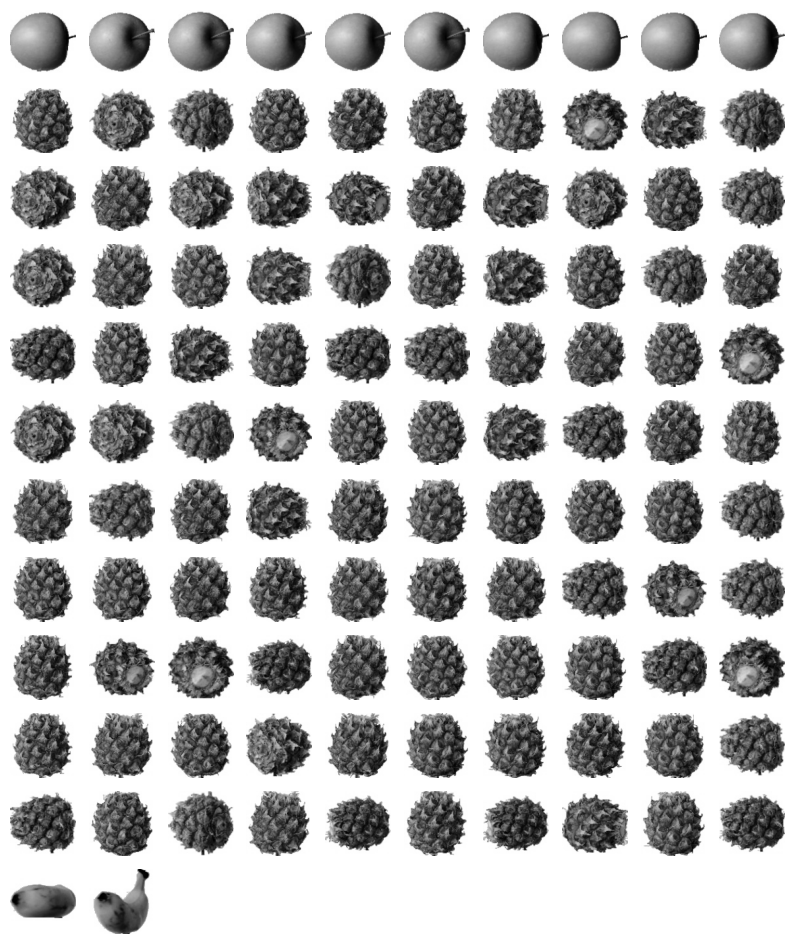

In [77]:
draw_fruits(fruits[km.labels_ == 0])

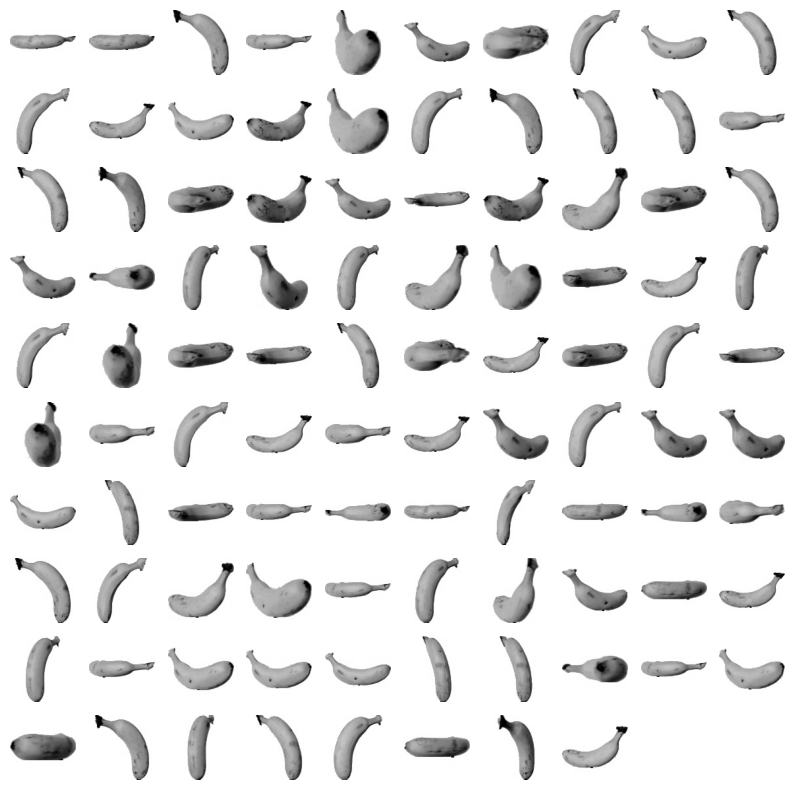

In [78]:
draw_fruits(fruits[km.labels_ == 1])

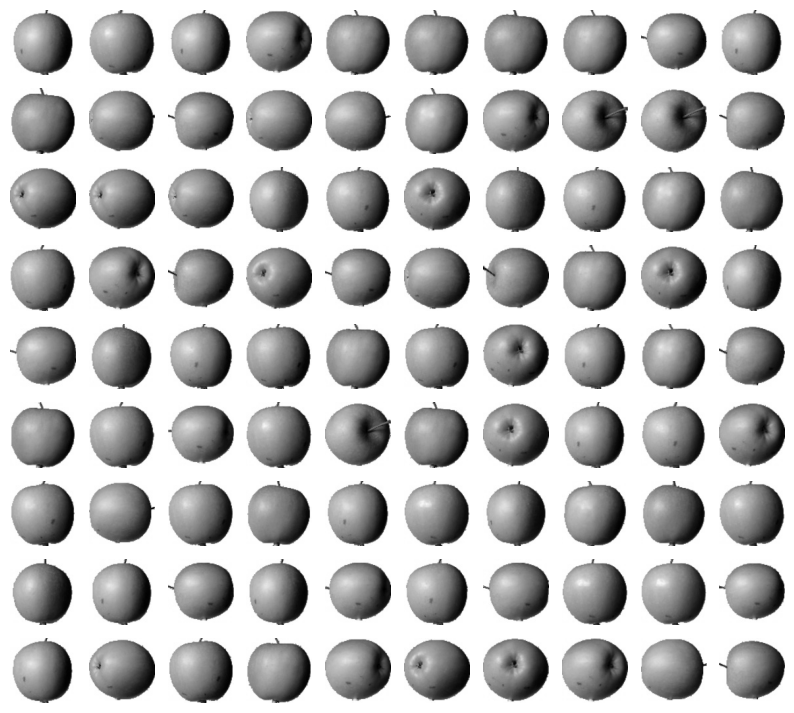

In [79]:
draw_fruits(fruits[km.labels_ == 2])

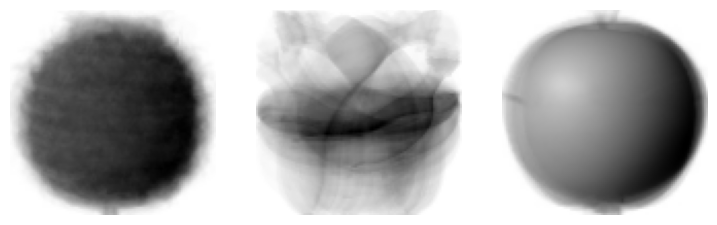

In [81]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

In [82]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [83]:
print(km.predict(fruits_2d[100:101]))

[0]


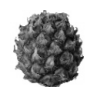

In [84]:
draw_fruits(fruits[100:101])

In [85]:
km.n_iter_

4

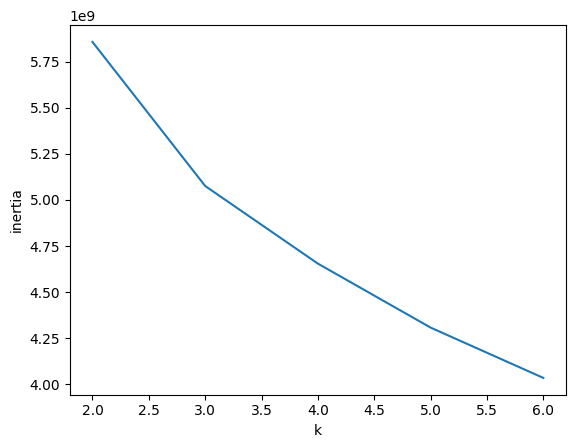

In [87]:
inertia = []
for k in range(2, 7) :
  km = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 06-3 Principal component analysis

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [92]:
pca.components_.shape

(50, 10000)

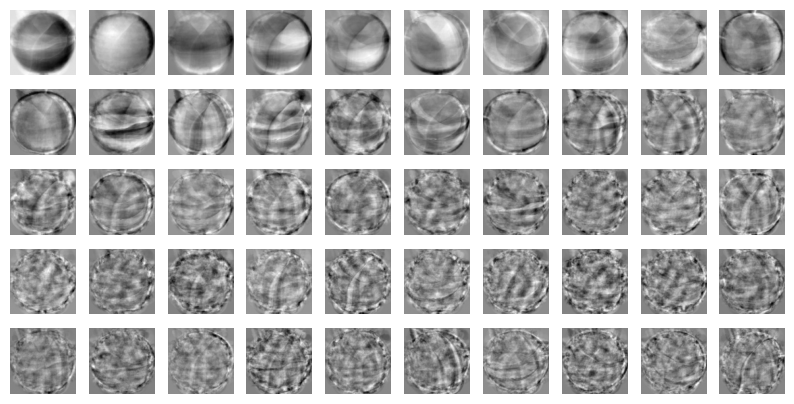

In [93]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [94]:
fruits_2d.shape

(300, 10000)

In [95]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [97]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

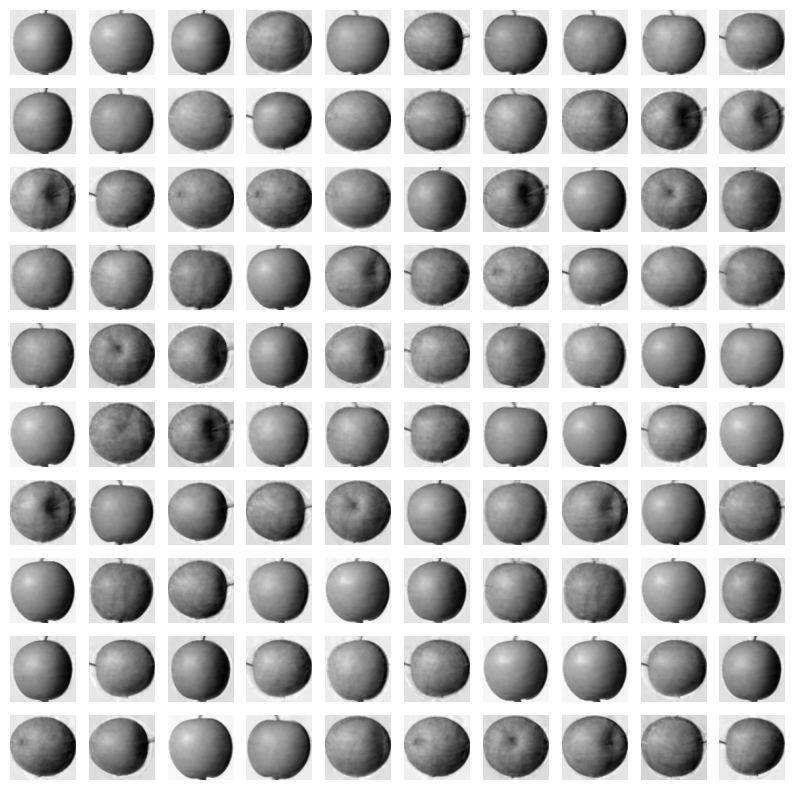

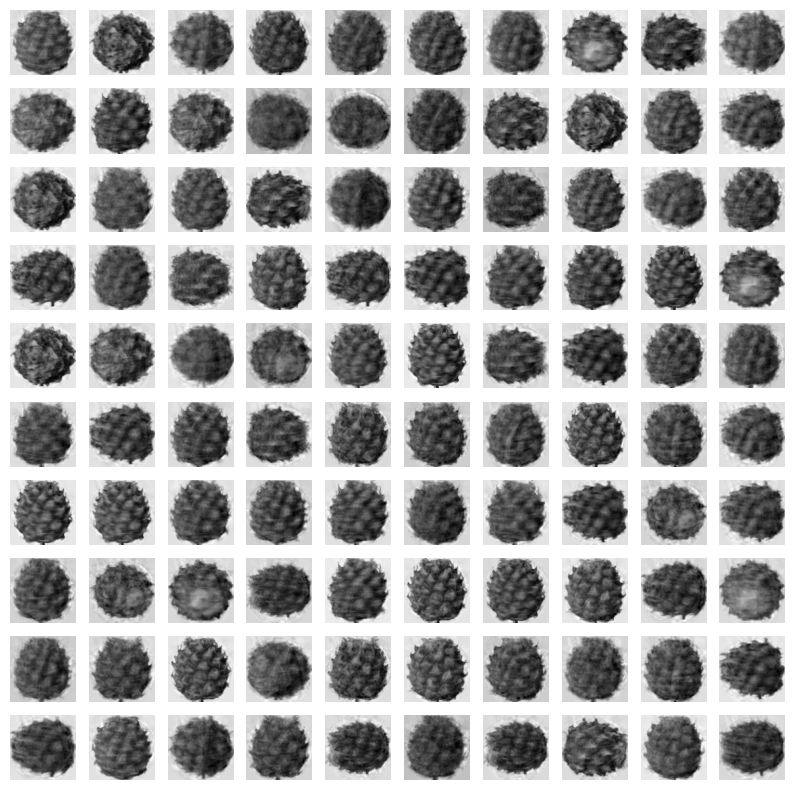

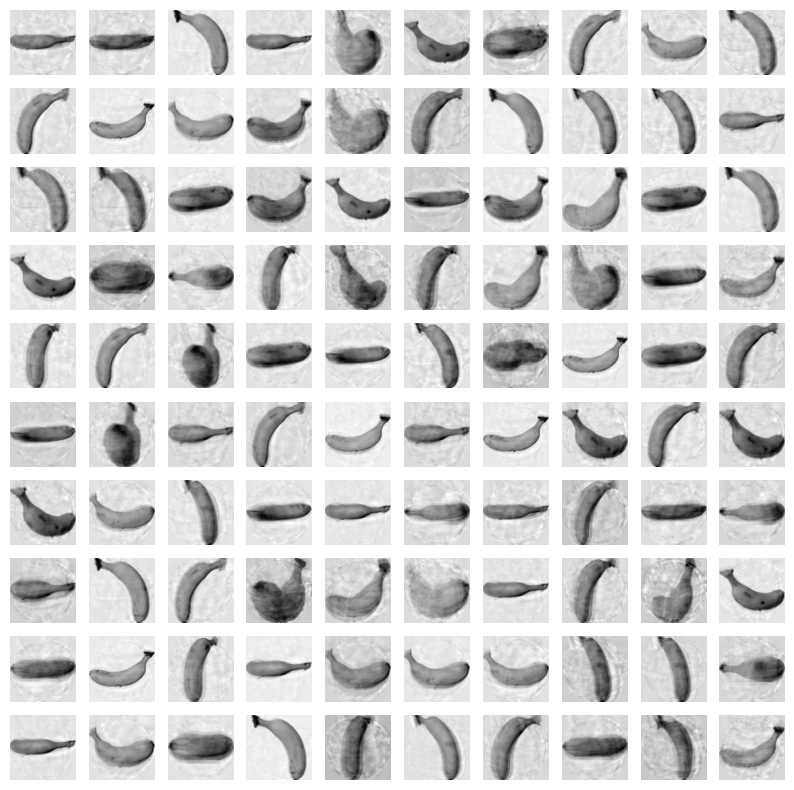

In [99]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start : start+100])
  print('\n')

In [100]:
np.sum(pca.explained_variance_ratio_)

0.9214810349613956

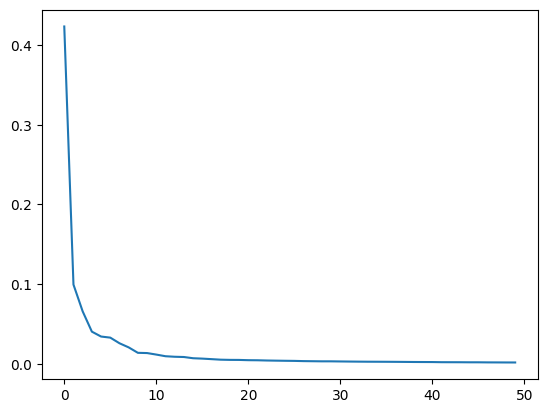

In [101]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [104]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [105]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6146989345550538


In [106]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.028936100006103516


In [107]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [108]:
pca.n_components_

2

In [110]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [111]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334
0.0523871898651123


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

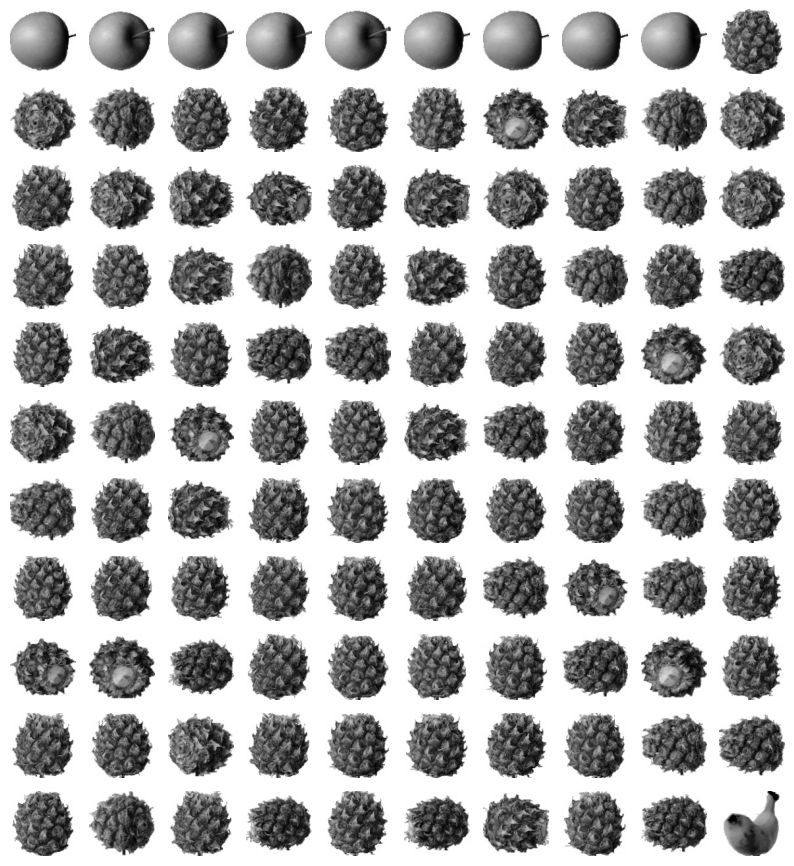

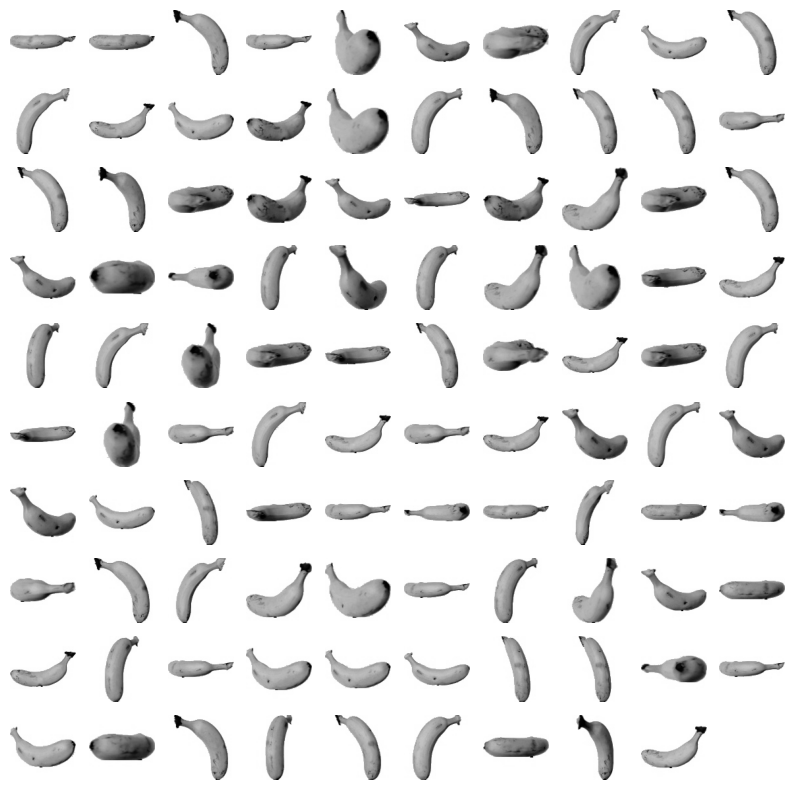

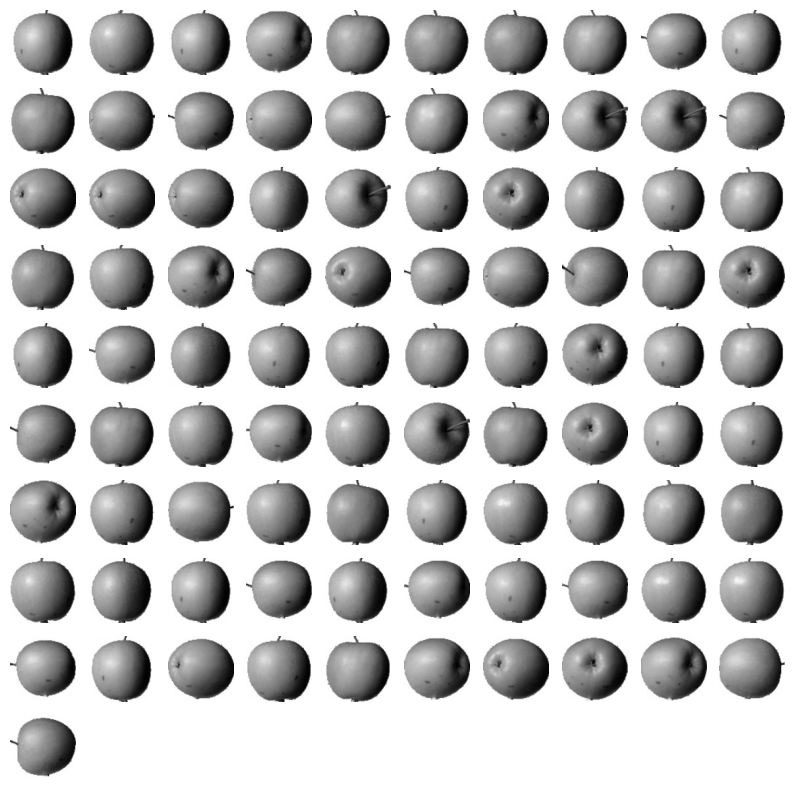

In [114]:
for label in range(0,3) :
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

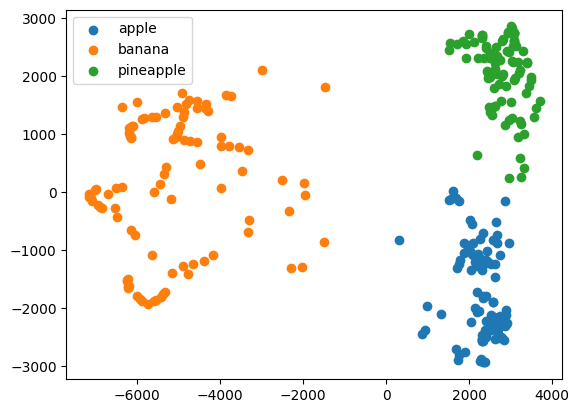

In [116]:
for label in range(0,3) :
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()